# 1.1  Problem Description

The ministry of defence requires a brief report on the trend of arrests concerning crimes in Chicago. They would like to know the status of crimes in Chicago and the various parts of Chicago that are prone to crimes to increase police patrolling in those areas.

In [1]:
# Importing necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install plotly_express
import plotly_express as px

%matplotlib inline

# 2.1 Uploading, exploring and cleaning data

In [2]:
#Fetching Chicago Crimes Dataset and displaying the first five rows in the dataset

df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
df.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0       08B   
1            RESIDENCE   False  ...  20.0            42.0       08B   
2               STREET   False  ...  37.0            25.0        24   
3             SIDEWALK   False  ...  28.0            25.0       08B   
4            RESIDENCE   False  ...  28.0            25.0        06   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   

   Longitude                       Location  
0 -87.706819  (41.864073157, -87.706818608)  
1 -87.604363   (41.782921527, -87.60436317)  
2 -87.758372  (41.894908283, -87.758371958)  
3 -87.749516  (41.885686845, -87.749515983)  
4 -87.761751  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [3]:
# Converting dataset to dataframe and dropping nonessential columns

df = df.drop(columns=['Unnamed: 0', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','Community Area','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)


# Information regarding the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1456714 non-null  int64  
 1   Date                  1456714 non-null  object 
 2   Primary Type          1456714 non-null  object 
 3   Description           1456714 non-null  object 
 4   Location Description  1455056 non-null  object 
 5   Arrest                1456714 non-null  bool   
 6   Year                  1456714 non-null  int64  
 7   Latitude              1419631 non-null  float64
 8   Longitude             1419631 non-null  float64
 9   Location              1419631 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 101.4+ MB


In [4]:
# Deleting the rows containing NULL(NaN) value

df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418405 entries, 0 to 1456713
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1418405 non-null  int64  
 1   Date                  1418405 non-null  object 
 2   Primary Type          1418405 non-null  object 
 3   Description           1418405 non-null  object 
 4   Location Description  1418405 non-null  object 
 5   Arrest                1418405 non-null  bool   
 6   Year                  1418405 non-null  int64  
 7   Latitude              1418405 non-null  float64
 8   Longitude             1418405 non-null  float64
 9   Location              1418405 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 109.6+ MB


# 3: Analysing the data

## 3.1 Plotting charts to show the number of crimes and arrests YOY

In [5]:
# Changing the date format to extract date data as required

df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

In [6]:
# Creating a dataframe for analysing the YOY data

df_crimes_YOY = df.resample('M').size()
df_crimes_YOY.head()

Date
2012-01-31    26016
2012-02-29    23777
2012-03-31    28462
2012-04-30    27087
2012-05-31    29989
Freq: M, dtype: int64

In [7]:
# Creating a dataframe for analysing the arrests which are made for the crimes committed

arrest_YOY = df[df['Arrest'] == True]['Arrest']
df_arrests_YOY = arrest_YOY.resample('M').size()
df_arrests_YOY

Date
2012-01-31    7541
2012-02-29    7617
2012-03-31    8394
2012-04-30    7399
2012-05-31    7889
2012-06-30    8028
2012-07-31    8432
2012-08-31    7695
2012-09-30    7264
2012-10-31    7208
2012-11-30    6534
2012-12-31    6449
2013-01-31    7287
2013-02-28    6722
2013-03-31    7665
2013-04-30    7479
2013-05-31    8078
2013-06-30    7386
2013-07-31    7542
2013-08-31    7689
2013-09-30    7039
2013-10-31    6885
2013-11-30    6508
2013-12-31    5763
2014-01-31    5698
2014-02-28    5794
2014-03-31    6775
2014-04-30    6745
2014-05-31    7303
2014-06-30    7053
2014-07-31    7501
2014-08-31    7190
2014-09-30    6561
2014-10-31    6586
2014-11-30    5609
2014-12-31    5223
2015-01-31    6087
2015-02-28    5110
2015-03-31    6522
2015-04-30    5903
2015-05-31    6240
2015-06-30    5905
2015-07-31    6136
2015-08-31    6089
2015-09-30    5705
2015-10-31    5674
2015-11-30    4872
2015-12-31    4074
2016-01-31    3876
2016-02-29    3845
2016-03-31    4439
2016-04-30    4532
2016-05

In [8]:
# Creating a dataframe for analysing the arrests which are made for the crimes committed

arrest_YOY = df[df['Arrest'] == True]['Arrest']
df_arrests_YOY = arrest_YOY.resample('M').size()

In [9]:
# Creating a function to analyse data YOY
def yearly_data_analysis(years_data,graph_title,y_label):
    years_data.plot()
    plt.title(graph_title)
    plt.xlabel('Years')
    plt.ylabel(y_label)
    plt.show()

## 3.2 Number of crimes that took place between 2012-2017 by heatmap

In [10]:
# Extracting months and years from the date-time data

df_month_year = pd.DataFrame(df_crimes_YOY,columns=['Number of cases'])
df_month_year['Months'] = df_crimes_YOY.index.month
df_month_year['Years'] = df_crimes_YOY.index.year
df_month_year.head()

Number of cases  Months  Years
Date                                      
2012-01-31            26016       1   2012
2012-02-29            23777       2   2012
2012-03-31            28462       3   2012
2012-04-30            27087       4   2012
2012-05-31            29989       5   2012

In [11]:
# Creating a function to display the number of crimes that took place between 2012-2017

def heatmap_for_number_of_crimes(value_of_months_and_years,heatmap_title):
    df_heatmap_crimes = value_of_months_and_years.pivot_table(index='Months',columns='Years',values='Number of cases',aggfunc = np.sum)
    plt.figure(figsize=(20, 10))
    sns.heatmap(
        data = df_heatmap_crimes,
        fmt="d",
        linewidths=0.5,
        cmap = 'PuBuGn'
    ).set_title(heatmap_title)

## 3.3 Places in Chicago prone to crimes

In [12]:
# Bar graph depicting the places in Chicago most prone to crimes

def places_prone_to_crime(data_of_locations,types_of_location,data_limit_to_be_displayed,plot_title):
    location_description = data_of_locations[types_of_location].value_counts().iloc[:data_limit_to_be_displayed].index
    plt.figure(figsize = (15,10))
    plt.xticks(rotation=30,fontsize=8)
    plt.title(plot_title)
    sns.countplot(x = types_of_location, data = data_of_locations, order = location_description)

## 3.4 Distribution of the crimes committed with respect to arrests made

Creating a scatter plot to view the balance between the crimes committed and arrests made in Chicago

In [13]:
# Removing outliers from the longitude and latitude column of the dataset

Outlier_index = df[(df['Longitude'] < -90)&(df['Latitude'] < 40)].index
df.drop(Outlier_index, inplace=True)

In [14]:
# Creating dataframe which contains the details of arrests made to the crimes committed

arrests_data = df.loc[df['Arrest'] == True]
arrests_data.head()

ID                Date       Primary Type  \
Date                                                                   
2016-05-03 23:40:00  10508693 2016-05-03 23:40:00            BATTERY   
2016-05-03 21:44:00  10508710 2016-05-03 21:44:00  WEAPONS VIOLATION   
2016-05-03 23:11:00  10508715 2016-05-03 23:11:00            BATTERY   
2016-05-04 11:15:00  10509422 2016-05-04 11:15:00              THEFT   
2016-05-04 11:30:00  10509460 2016-05-04 11:30:00  CRIMINAL TRESPASS   

                                  Description    Location Description  Arrest  \
Date                                                                            
2016-05-03 23:40:00   DOMESTIC BATTERY SIMPLE               APARTMENT    True   
2016-05-03 21:44:00  UNLAWFUL POSS OF HANDGUN  VEHICLE NON-COMMERCIAL    True   
2016-05-03 23:11:00   DOMESTIC BATTERY SIMPLE                SIDEWALK    True   
2016-05-04 11:15:00              RETAIL THEFT      SMALL RETAIL STORE    True   
2016-05-04 11:30:00                   TO LAND              DRUG STORE    True   

                     Year   Latitude  Longitude                       Location  
Date                                                                            
2016-05-03 23:40:00  2016  41.864073 -87.706819  (41.864073157, -87.706818608)  
2016-05-03 21:44:00  2016  41.761733 -87.558310  (41.761733286, -87.558309979)  
2016-05-03 23:11:00  2016  41.893027 -87.626751  (41.893026751, -87.626750829)  
2016-05-04 11:15:00  2016  41.742710 -87.634088  (41.742710224, -87.634088181)  
2016-05-04 11:30:00  2016  41.765756 -87.576292  (41.765755571, -87.576292427)

In [15]:
# Creating a function to visualise the crimes committed in Chicago w.r.t to the arrests made

def visualising_balance_between_crimes_and_arrests(crimes,arrests,x_label,y_label,x_legend_label,y_legend_label,plot_title):
    plt.figure(figsize=(10, 8), dpi=200)
    plt.title(plot_title)
    plt.scatter(x=crimes[x_label], y=crimes[y_label], label=x_legend_label, s=5, color ='blue')
    plt.scatter(x=arrests[x_label], y=arrests[y_label], label=y_legend_label, s=1, color ='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc="best", fontsize=12)
    plt.show()

# VISUALISATIONS

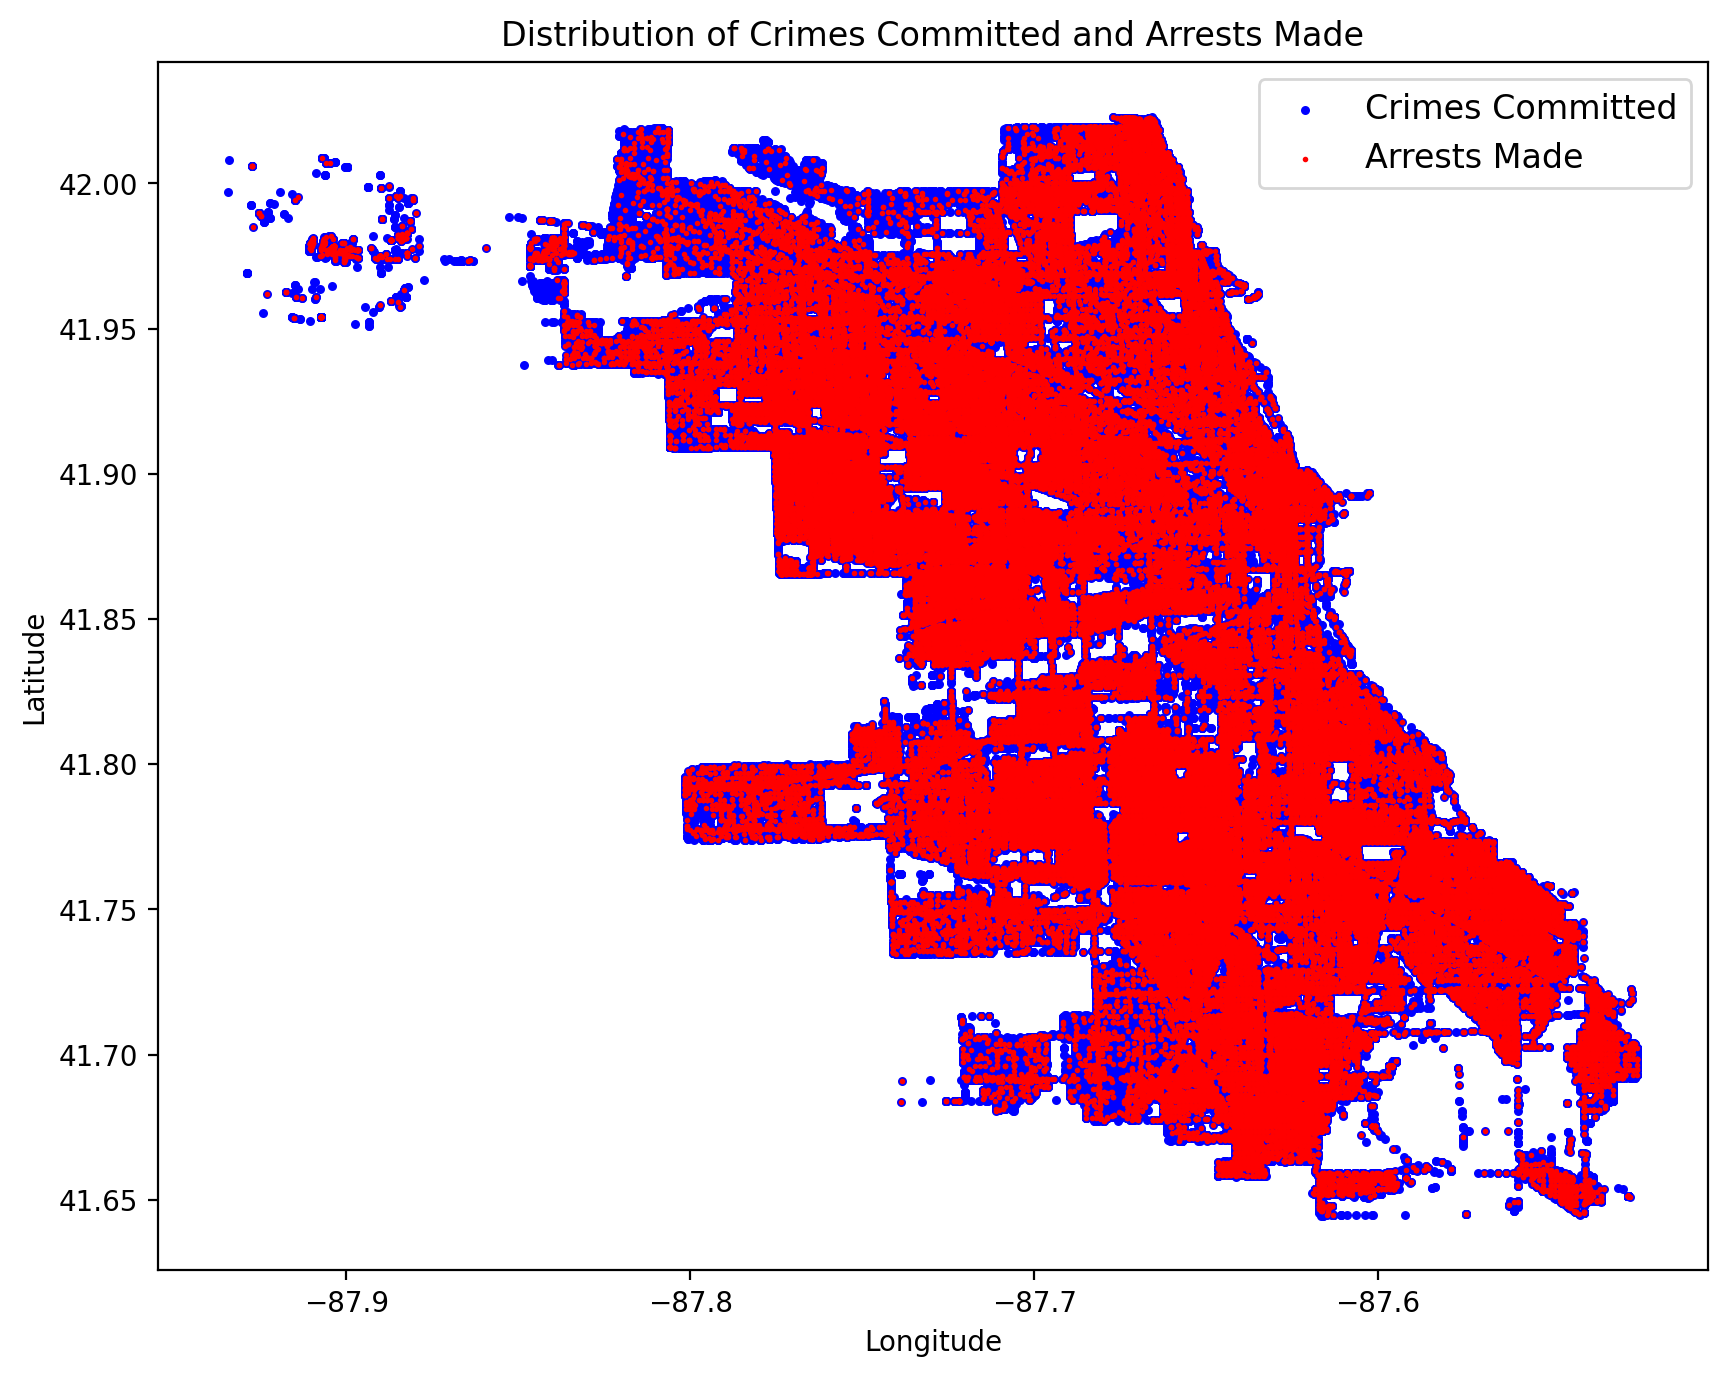

In [16]:
# Calling functions to display "TRENDS IN ARRESTS CONCERNING CRIMES"

# Figure 3 - Distribution of arrests concerning crimes

visualising_balance_between_crimes_and_arrests(df,arrests_data,'Longitude','Latitude','Crimes Committed','Arrests Made','Distribution of Crimes Committed and Arrests Made')

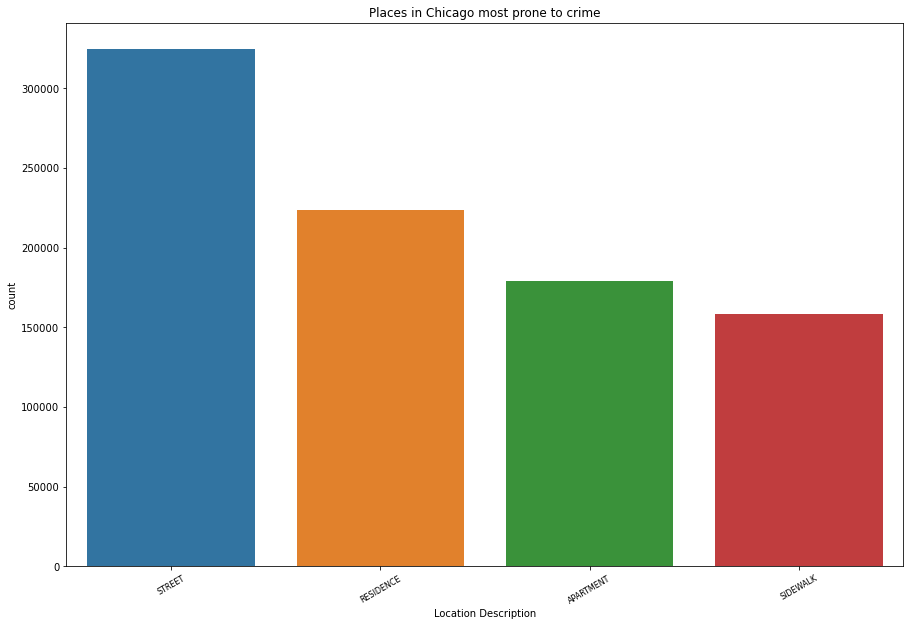

In [17]:
#Calling functions to display "AREAS PRONE TO CRIME"


# Depicting the places in Chicago that are most prone to crimes
places_prone_to_crime(df,'Location Description',4,'Places in Chicago most prone to crime')

# 4: Inferences

The Chicago Crimes dataset from the year 2012-2017 was analysed. Following are the inferences.
    
1.	Trends in arrests concerning crimes

Figure 1 depicts that the number of crimes committed over the years has slightly reduced. Figure 2 shows the arrests made concerning the crimes have considerably reduced. Figure 3 depicts the imbalance in the number of crimes committed and the arrests made in Chicago. This displays the need to enhance the police force to protect the public from various crimes. </font>

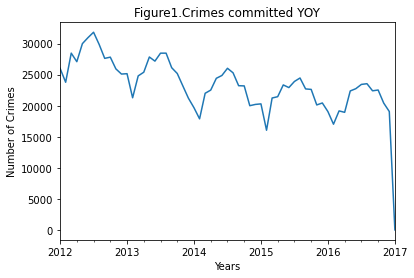

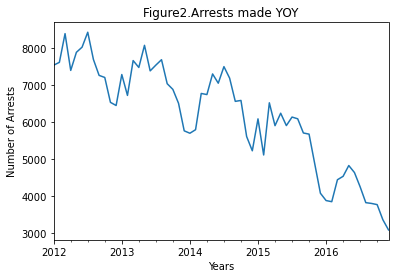

In [18]:
# Figure 1 - Crimes committed YOY

yearly_data_analysis(df_crimes_YOY,'Figure1.Crimes committed YOY','Number of Crimes') 

# Figure 2 - Arrests made YOY

yearly_data_analysis(df_arrests_YOY,'Figure2.Arrests made YOY','Number of Arrests')

2. Months and areas prone to crime

The heatmap depicts the number of crimes in each month over the years in consideration. The months; of May, June, July, August, September, and October are comparatively more prone to crimes than the remaining months. Hence, police forces should be on high alert during these months to protect the public mainly in areas like the streets, residential areas, apartments, sidewalks etc (from the bar graph).



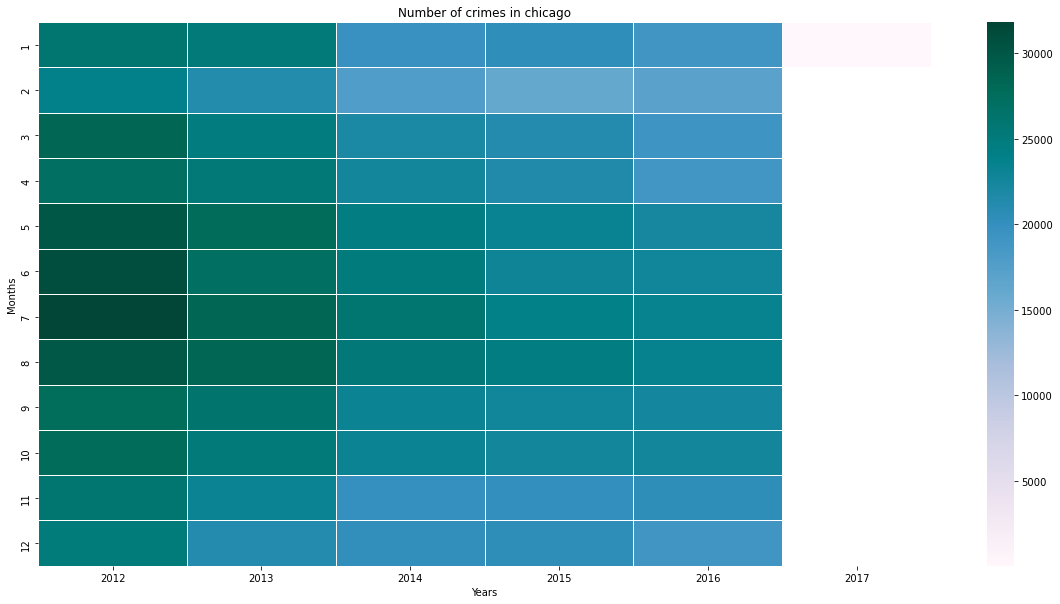

In [19]:
# Depicting the crimes in various months from the year 2012 to 2017
heatmap_for_number_of_crimes(df_month_year,'Number of crimes in chicago')

# 5: Limitation

The cause of the reduction in arrests is unknown.